In [1]:
import sys
sys.path.append('..')

import cirq
import matplotlib.pyplot as plt

from daqec import graphs, circuits, passes

**Demo circuit**

In [2]:

circ = cirq.Circuit()

qubits = cirq.LineQubit.range(3)
circ.append(cirq.X.on(qubits[0]))
circ.append(cirq.X.on(qubits[2]))
circ.append(cirq.CNOT(*qubits[:2]))
circ.append(cirq.CNOT(*qubits[1:]))

print(circ)

0: ───X───@───────
          │
1: ───────X───@───
              │
2: ───X───────X───


In [3]:
dag = circuits.circuit_to_dag(circ)

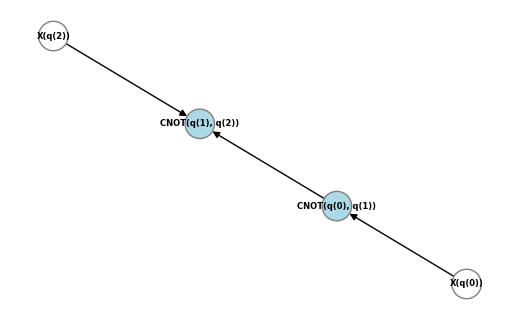

In [4]:
graphs.draw_circ_dag_mpl(dag, figsize=(5, 3))

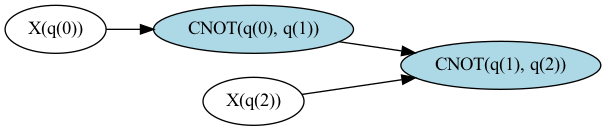

In [5]:
graphs.draw_circ_dag_graphviz(dag)


In [6]:
circuits.dag_to_circuit(dag)

0: ───X───@───────
          │
1: ───────X───@───
              │
2: ───X───────X───

In [7]:
dag_contracted = passes.contract_1q_gates_on_dag(dag)


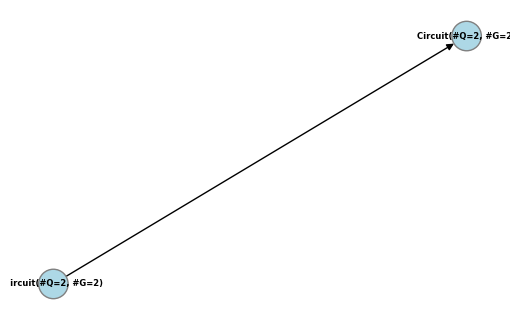

In [8]:
graphs.draw_circ_dag_mpl(dag_contracted, figsize=(5, 3))

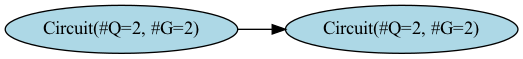

In [9]:
graphs.draw_circ_dag_graphviz(dag_contracted)

In [10]:
dag_contracted.nodes()[1]

0: ───X───@───
          │
1: ───────X───

**Practical circuit**

In [15]:
from cirq.contrib.qasm_import import circuit_from_qasm

qasm_file = '../benchmarks/random/rand_8.qasm'

with open(qasm_file, 'r') as f:
    circ = circuit_from_qasm(f.read())

In [16]:
circ = circ[:10]
circ

┌──────┐   ┌─────┐          ┌─────┐   ┌──────┐   ┌─────┐   ┌─────────┐   ┌──┐
q_0: ─────────X─────T────────T───────S─────────@──────────S─────────S─────────────T─────S───T^-1───
              │                                │
q_1: ────S────┼─────────@────T^-1────T─────────┼────@─────T─────────────X──────────X────T───T^-1───
              │         │                      │    │                   │          │
q_2: ────T^-1─┼─────S^-1┼────H───────────@─────┼S^-1┼─────T^-1──────T^-1┼─────────X┼────H───H──────
              │         │                │     │    │                   │         ││
q_3: ────────@┼─────S───┼────S^-1────X───┼─────┼H───┼─────────X─────T───┼─────────@┼────@───T──────
             ││         │            │   │     │    │         │         │          │    │
q_4: ────H───┼┼─────S───┼────X───────┼───X─────X────┼─────S───┼─────X───┼──────────@────X───@──────
             ││         │            │              │         │     │   │                   │
q_5: ────S───┼┼─────X───┼────S───────@─────────X────┼─────S^-1┼─────┼───┼S^-1─────S─────S───X──────
             ││     │   │                      │    │         │     │   │
q_6: ────────┼@─────┼───X────S───────T^-1──────@────┼─────H───┼─────┼───@─────────@─────X───T^-1───
             │      │                               │         │     │             │     │
q_7: ────────X──────@────────H───────T^-1───────────X─────────@─────@─────────────X─────@───H──────
        └──────┘   └─────┘          └─────┘   └──────┘   └─────┘   └─────────┘   └──┘

In [17]:
dag = circuits.circuit_to_dag(circ)


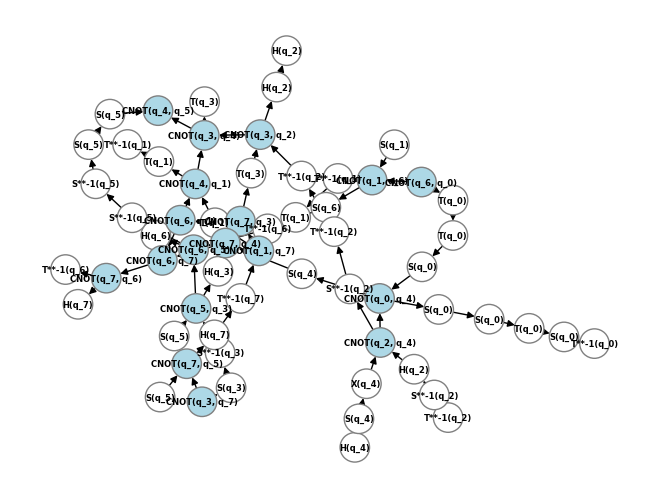

In [18]:
graphs.draw_circ_dag_mpl(dag)


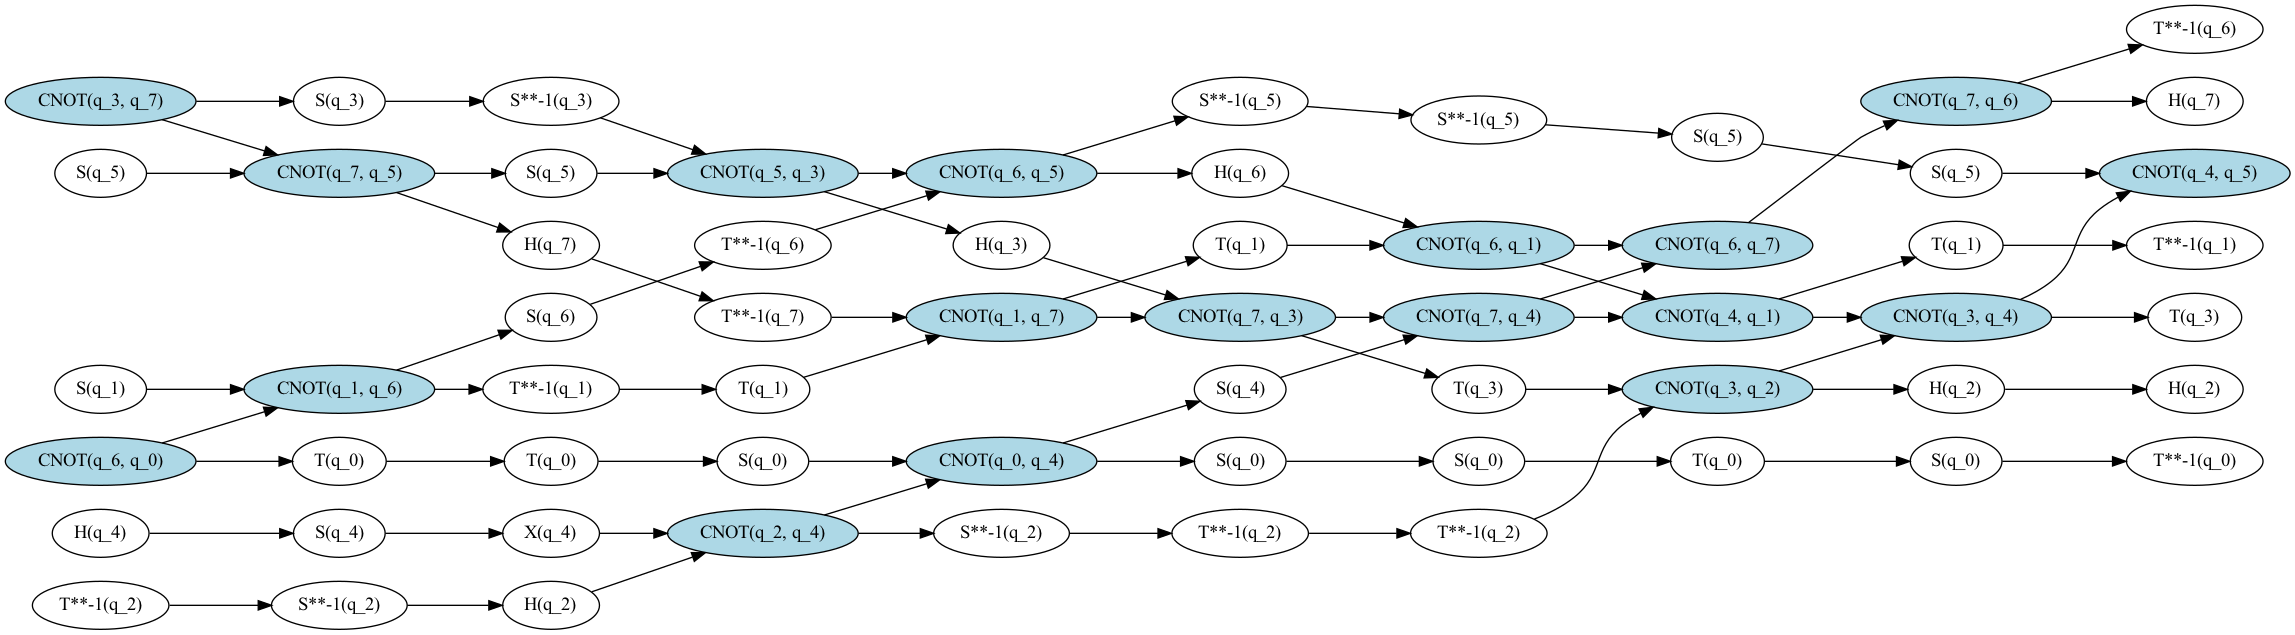

In [20]:
graphs.draw_circ_dag_graphviz(dag)